In [275]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Preprocessing import Process_column

# Dataset Download Link: [**`Spam Email classification`**](https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification/data)

In [232]:
df = pd.read_csv("Email_Spam.csv")
df.drop(columns="Unnamed: 0",inplace=True)
df

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [233]:
df.isnull().sum()

Label        0
EmailText    0
dtype: int64

### Duplicated Data

> - We should delete it to prevent misleading to algorithm 

In [234]:
df.duplicated().sum()

np.int64(403)

In [235]:
df[df.duplicated()]

,Label,EmailText
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [236]:
df.drop_duplicates(inplace=True)
df

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## 💥 **Imbalanced classes**, which introduce bias to the majority class

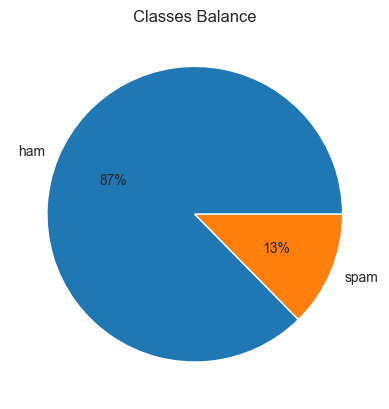

In [237]:
plt.pie(df["Label"].value_counts(),labels=["ham","spam"],autopct='%1.0f%%')
plt.title(label="Classes Balance")
plt.show()


# **`NOW`** we Start Text Preprocessing 

## `1` Lowering Text 

In [238]:
df["CleanEmailText"] = df["EmailText"].apply(lambda x: x.lower())
df

,Label,EmailText,CleanEmailText
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?,will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...


## `2` Removing Links from Dataset

In [239]:
df["links"] = df["EmailText"].apply(lambda x: re.findall(r"https?\S+",x))
df

,Label,EmailText,CleanEmailText,links
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",[]
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,[]
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,[]
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",[]
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,[]
5568,ham,Will �_ b going to esplanade fr home?,will �_ b going to esplanade fr home?,[]
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...",[]
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,[]


# Intlize object from `Process_column` class 

> - it's build to update **`CleanEmailText`** Column 

In [240]:
Cleaned = Process_column(Column_name="CleanEmailText",Dataset=df)

## `3` Removing any links 

In [241]:
Cleaned.Updeate_column(lambda x:re.sub(r"https?\S+"," ",x))
df

,Label,EmailText,CleanEmailText,links
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",[]
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,[]
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,[]
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",[]
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,[]
5568,ham,Will �_ b going to esplanade fr home?,will �_ b going to esplanade fr home?,[]
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...",[]
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,[]


In [242]:
rows_with_links = df[df["links"].apply(lambda x: len(x) > 0)]
rows_with_links

,Label,EmailText,CleanEmailText,links
15,spam,"XXXMobileMovieClub: To use your credit, click ...","xxxmobilemovieclub: to use your credit, click ...",[http://wap.]
304,spam,SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...,sms. ac blind date 4u!: rodds1 is 21/m from ab...,[http://img.]
517,spam,Your credits have been topped up for http://ww...,your credits have been topped up for your re...,[http://www.bubbletext.com]
634,spam,"Dear Voucher Holder, 2 claim this weeks offer,...","dear voucher holder, 2 claim this weeks offer,...",[http://www.e-tlp.co.uk/expressoffer]
832,spam,"Dear Voucher Holder, To claim this weeks offer...","dear voucher holder, to claim this weeks offer...",[http://www.e-tlp.co.uk/expressoffer]
880,spam,Reminder: You have not downloaded the content ...,reminder: you have not downloaded the content ...,[http://doit.]
1104,spam,Message Important information for O2 user. Tod...,message important information for o2 user. tod...,[http://www.urawinner.com]
3057,spam,You are now unsubscribed all services. Get ton...,you are now unsubscribed all services. get ton...,[http://gotbabes.co.uk.]
3172,spam,"Dear Voucher Holder, To claim this weeks offer...","dear voucher holder, to claim this weeks offer...",[http://www.e-tlp.co.uk/reward.]
3461,spam,Bloomberg -Message center +447797706009 Why wa...,bloomberg -message center +447797706009 why wa...,[http://careers.]


In [243]:
for index,row in rows_with_links.iterrows():
    print(f"{row["EmailText"],row["CleanEmailText"]}",end="\n")

('XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL', 'xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or click here>>   xxxmobilemovieclub.com?n=qjkgighjjgcbl')
('SMS. ac Blind Date 4U!: Rodds1 is 21/m from Aberdeen, United Kingdom. Check Him out http://img. sms. ac/W/icmb3cktz8r7!-4 no Blind Dates send HIDE', 'sms. ac blind date 4u!: rodds1 is 21/m from aberdeen, united kingdom. check him out   sms. ac/w/icmb3cktz8r7!-4 no blind dates send hide')
('Your credits have been topped up for http://www.bubbletext.com Your renewal Pin is tgxxrz', 'your credits have been topped up for   your renewal pin is tgxxrz')
('Dear Voucher Holder, 2 claim this weeks offer, at your PC go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply.2 stop texts txt STOP to 80062.', 'dear voucher holder, 2 claim this weeks offer, at your pc go to   ts&cs apply.2 stop texts txt stop 

## `4` Removing Numbers & Punctatuins

In [244]:
Cleaned.Updeate_column(lambda x : re.sub(r"[^a-zA-Z]"," ",x))
df

,Label,EmailText,CleanEmailText,links
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...,[]
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...,[]
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,[]
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,[]
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u...,[]
5568,ham,Will �_ b going to esplanade fr home?,will b going to esplanade fr home,[]
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other s...,[]
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i d...,[]


## `5` Removing Any Single Letters

In [245]:
Cleaned.Updeate_column(func=lambda x: re.sub(r"\b[a-zA-Z]{1}\b"," ",x))
df

,Label,EmailText,CleanEmailText,links
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...,[]
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in wkly comp to win fa cup fina...,[]
3,ham,U dun say so early hor... U c already then say...,dun say so early hor already then say,[]
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah don think he goes to usf he lives aro...,[]
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact ...,[]
5568,ham,Will �_ b going to esplanade fr home?,will going to esplanade fr home,[]
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other s...,[]
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but acted like ...,[]


## `6` Tokonizing Data

In [246]:
Cleaned.Updeate_column(lambda x: word_tokenize(x))
df

,Label,EmailText,CleanEmailText,links
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o...",[]
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]",[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, wkly, comp, to, win, fa, cup...",[]
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]",[]
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, don, think, he, goes, to, usf, he, lives...",[]
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[this, is, the, nd, time, we, have, tried, con...",[]
5568,ham,Will �_ b going to esplanade fr home?,"[will, going, to, esplanade, fr, home]",[]
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, was, in, mood, for, that, so, any, othe...",[]
5570,ham,The guy did some bitching but I acted like i'd...,"[the, guy, did, some, bitching, but, acted, li...",[]


## `7` removing StopWords in **`en`**

In [247]:
# nltk.download("stopwords")
Stopwords__ = stopwords.words("english")
print(f"Number of Stop Words in English = {len(Stopwords__)}")

Number of Stop Words in English = 198


In [248]:
def Remove_Stopwords(text):
    return [word for word in text if word not in Stopwords__]

In [249]:
Cleaned.Updeate_column(Remove_Stopwords)
df

,Label,EmailText,CleanEmailText,links
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, g...",[]
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]",[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",[]
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, already, say]",[]
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",[]
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[nd, time, tried, contact, pound, prize, claim...",[]
5568,ham,Will �_ b going to esplanade fr home?,"[going, esplanade, fr, home]",[]
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestions]",[]
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",[]


## `8` Leamtaizing data 

In [250]:
from nltk.stem import WordNetLemmatizer

Lemmarizer = WordNetLemmatizer()
def Lemmatizong_data(text:list):
    return [Lemmarizer.lemmatize(word=word,pos="v") for word in text]

Cleaned.Updeate_column(Lemmatizong_data)
df


,Label,EmailText,CleanEmailText,links
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, g...",[]
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, oni]",[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",[]
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, already, say]",[]
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, go, usf, live, around, though]",[]
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[nd, time, try, contact, pound, prize, claim, ...",[]
5568,ham,Will �_ b going to esplanade fr home?,"[go, esplanade, fr, home]",[]
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestions]",[]
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitch, act, like, interest, buy, somethi...",[]


## `9` Trans Data ot String

In [251]:
def to_string(text:list):
    return " ".join(text)

Cleaned.Updeate_column(to_string)
df

,Label,EmailText,CleanEmailText,links
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...,[]
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni,[]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,[]
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,[]
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live around though,[]
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time try contact pound prize claim easy cal...,[]
5568,ham,Will �_ b going to esplanade fr home?,go esplanade fr home,[]
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,[]
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy something else...,[]


## 🟢 Finlaly we reach to **Model Preperation** 

In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

In [253]:
X = df["CleanEmailText"]
Y = df["Label"]

In [254]:
x_train,x_text,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)

In [255]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_text)


In [256]:
print(f"number of Features = {len(tfidf.get_feature_names_out())}")

number of Features = 5390


# ✅ Support Vector Machine

In [257]:
svc = SVC(random_state=42)
svc

SVC(random_state=42)

In [258]:
svc.fit(x_train,y_train)
y_predicted = svc.predict(x_test)

In [259]:
acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"SVM Accurecy score = {acc * 100:.02f}%")

SVM Accurecy score = 98.07%


In [260]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1331
        spam       1.00      0.86      0.93       220

    accuracy                           0.98      1551
   macro avg       0.99      0.93      0.96      1551
weighted avg       0.98      0.98      0.98      1551



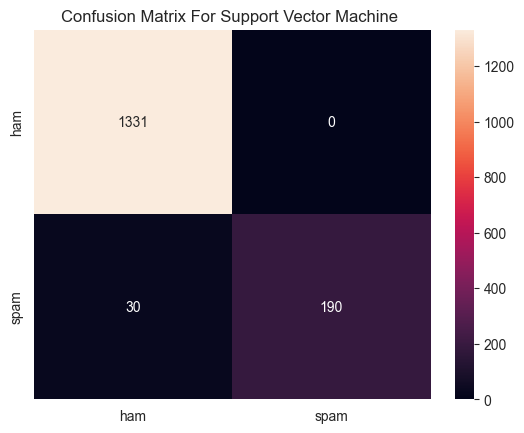

In [261]:
class_names = ['ham', 'spam']  
conf = confusion_matrix(y_true=y_test,y_pred=y_predicted)
sns.heatmap(conf,annot=True,fmt="1.0f",xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix For Support Vector Machine ")
plt.show()

# 🟢 Decision Tree Classifier

In [262]:
Dt = DecisionTreeClassifier(random_state=42)
Dt.fit(x_train,y_train)
y_predicted = Dt.predict(x_test)

In [263]:
acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"Decision Tree Classifier Accurecy score = {acc * 100:.02f}%")

Decision Tree Classifier Accurecy score = 96.00%


In [264]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1331
        spam       0.85      0.87      0.86       220

    accuracy                           0.96      1551
   macro avg       0.92      0.92      0.92      1551
weighted avg       0.96      0.96      0.96      1551



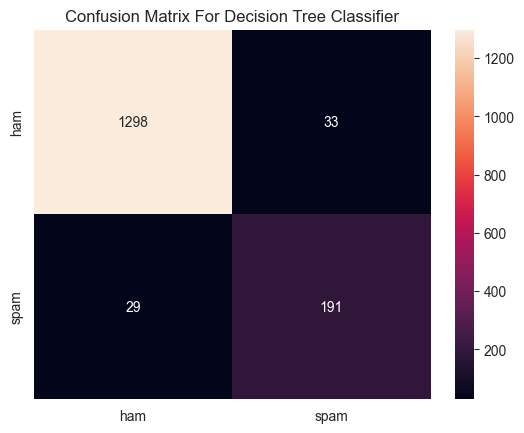

In [265]:
class_names = ['ham', 'spam']  
conf = confusion_matrix(y_true=y_test,y_pred=y_predicted)
sns.heatmap(conf,annot=True,fmt="1.0f",xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix For Decision Tree Classifier")
plt.show()

# 🟢 Multinomial Naive Bayes

In [266]:
Dt = MultinomialNB()
Dt.fit(x_train,y_train)
y_predicted = Dt.predict(x_test)

In [267]:
acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"Multinomial Naive Bayes Accurecy score = {acc * 100:.02f}%")

Multinomial Naive Bayes Accurecy score = 95.87%


In [268]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1331
        spam       0.99      0.71      0.83       220

    accuracy                           0.96      1551
   macro avg       0.97      0.86      0.90      1551
weighted avg       0.96      0.96      0.96      1551



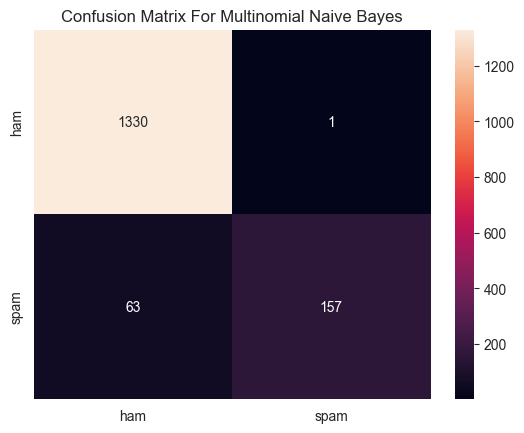

In [269]:
class_names = ['ham', 'spam']  
conf = confusion_matrix(y_true=y_test,y_pred=y_predicted)
sns.heatmap(conf,annot=True,fmt="1.0f",xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix For Multinomial Naive Bayes")
plt.show()

# 📑 Comparison between **`3 models`** which we used

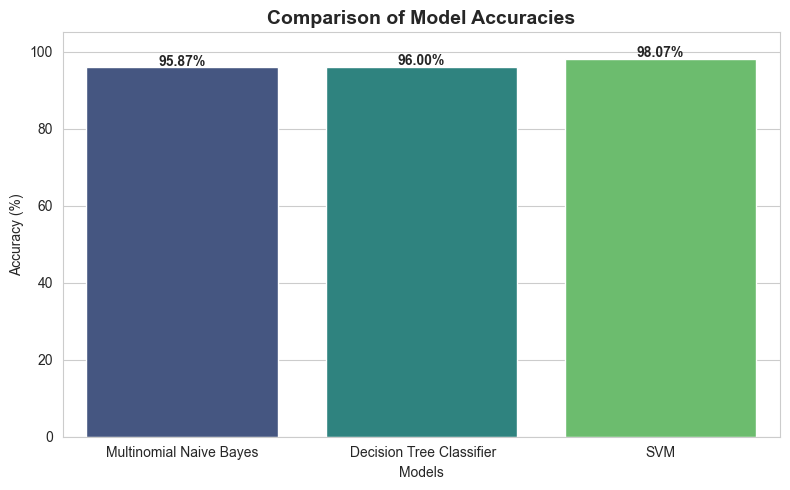

In [274]:
Models_Accuracy = {"Multinomial Naive Bayes":95.87,"SVM":98.07," Decision Tree Classifier":96.00}


df_acc = pd.DataFrame(list(Models_Accuracy.items()), columns=["Model", "Accuracy"])

df_acc = df_acc.sort_values("Accuracy", ascending=True)

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_acc,x="Model", y="Accuracy",palette="viridis",hue="Model")

for i, v in enumerate(df_acc["Accuracy"]):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')


plt.title("Comparison of Model Accuracies", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

# 💻 Testing model in unseen Data

In [271]:
def Preocess_data(text:str):
    text = text.lower()
    text = re.sub(r"https?\S+"," ",text)
    text = re.sub(r"[^a-zA-Z]"," ",text)
    text = re.sub(r"\b[a-zA-Z]{1}\b"," ",text)
    text = word_tokenize(text)
    text = [token for token in text if token not in Stopwords__]
    text = [Lemmarizer.lemmatize(token,pos="v") for token in text]
    text = " ".join(text)
    return tfidf.transform([text])

In [272]:
text = """Say hello to the new Magic Background feature, the fastest way to create realistic setting for your image on remove.bg!
The best part? You don't need to write any prompts. Simply select an inspiration image as a starting point and let the AI generate a seamlessly-fitting background for you in seconds.
From product photography and digital ads to content creation, Magic Background helps your images look their best. ✨"""

In [273]:
test = Preocess_data(text=text)
svc.predict(test)

array(['ham'], dtype=object)

---

<h1 align="center">The End of model 😎</h1>

---